# ECSI MULTIGROUP ANALYSIS

Hugo Silveira da Cunha

`08/05/2017  WIP`

## INTRODUCTION

### ECSI - European Customer Satisfaction Index
ECSI, the European Customer Satisfaction Index, is a statistical methodology to find out which factors are most important to the creation of customer satisfaction and loyalty.

ECSI was inspired by the work of the Swedish Professor Claes Fornell, one of the most influential scholars in marketing science today. His name can be found on the top most academically cited papers from the leading sources in the field, seen as an outstanding name in the study of customer satisfaction measurement and asset measurement. He was the author of the model for the Swedish economy, the Swedish Customer Satisfaction Barometer (SCSB), in 1989. Five years later, in October 1994, together with Donald C. Cook from the University of Michigan and in conjunction with the American Society for Quality and CFI Group, they have developed the American Customer Satisfaction Index (ACSI) as an economic indicator that measures the satisfaction of consumers across the U.S. economy. 

A few years later, ECSI was initiated by the EU Commission in collaboration with the European Foundation for Quality Management and the European Organization for Quality (EOQ) along with a network of universities and business schools. ECSI Technical Committee has developed the method of analysis, the econometric model and the causality analysis derived from the ACSI.  

The data is collected from surveys and respondents are asked to rate their experience of individual organisations they have dealt with in the previous six months, using a scale of 1 – 10, on a series of metrics covering perceptions of image, quality and price, complaint handling, as well as attitudes towards loyalty and trust. The metrics reflect the priorities customers have identified as the most important attributes of customer experience according to the research. Overall scores for each sector are the mean averages of all responses for that sector. 

The ECSI score for each organisation, sector or country is the average of all of its customers’ satisfaction scores. These scores are then multiplied by ten so that the index scores are expressed as a number out of 100. 

This methodological and reliable approach, offers a unique benchmark capability across all companies, industries, countries and time periods with the confidence that results are consistent and are proven over time in scientific research literature. 

### Structural equation modeling (SEM)

Structural equation modeling (SEM) was applied to assess latent variables at the observation level and test relationships between latent variables on the theoretical level.

We have considered two methods: 

- covariance-based technique (CB-SEM; Jöreskog 1978, 1993)

- variance based partial least squares (PLS-SEM; Lohmöller 1989; Wold 1982, 1985). 

Both methods have the same root (Jöreskog and Wold 1982), previous marketing research has focused primarily on CB-SEM (e.g., Bagozzi 1994; Baumgartner and Homburg 1996; Steenkamp and Baumgartner 2000).

Covariance-based SEM (CB-SEM), originally developed by Wold (1975) is primarily used to confirm theories, validate  relationships between variables that can be tested measured directly or indirectly. 

Lohmöller, 1989, extended CB-SEM to a second-generation technique to overcome their weaknesses and developed PLS-SEM or PLS path modeling. It is a very usefull method to develop theories in  exploratory research, focused on explaining the variance in the dependent variables when examining the model.

## METHODOLOGY

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%pylab inline
#%matplotlib inline

# Scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from warnings import filterwarnings

Populating the interactive namespace from numpy and matplotlib


In [2]:
mqm = pd.read_csv('../BD_MQM.csv', index_col = "Respondent", sep=";",
                  encoding="utf8", skipinitialspace=True, na_values=['9999','99'])

### Some Previous Considerations
In order to precisely apply the methodology, some previous considerations where made about:

- the variate;
- the measurement;
- the measurement scales;
- the coding;
- the data distributions.

**The variate:**
Each construct is a linear combination of several variables that are chosen based on the questions of the questionnaire. The responses from 1758 respondents were arranged in a data matrix. All factor loading were  significant, they were all greater than 0.50 as suggested in Hair, Black, Babin, Anderson, 2010.

In [3]:
image = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E']
expectations = ['Q5A', 'Q5B','Q5C']
perceivedQuality = ['Q6', 'Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F', 'Q7G', 'Q7H']
perceivedValue = ['Q10', 'Q11']
satisfaction = ['Q3', 'Q9', 'Q18']
complaints = ['Q1516']
loyalty = ['Q12', 'Q17']
socio = ['Bank', 'B1', 'B5', 'B6', 'B8']

**The measurement:** the measured phenomenon is abstract, complex, and not directly observable. Satisfaction, loyalty and perceived image, value and quality are latent variables (constructs) and unobservable. However, the indicators or manifestations of each item represents a single separate aspect, or proxie, of those larger abstract concepts. 

The combination of several items in a scale, a multi-item scale, was used to indirectly measure each of those concepts forming a single accurate composite score - the variate score. 

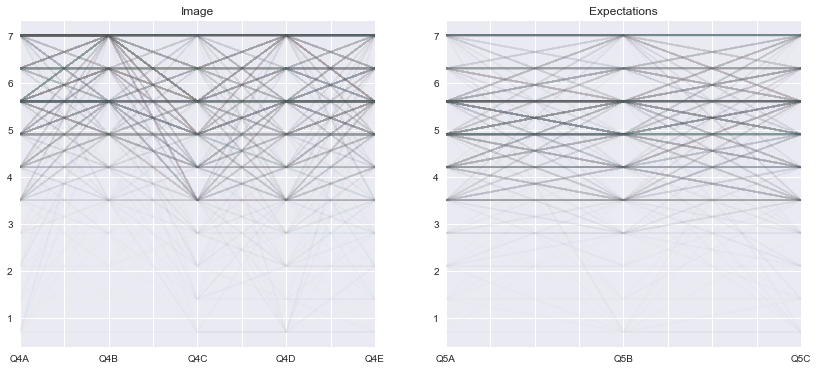

In [4]:
# Image and Expections constructs response patterns 
fig, ax = plt.subplots(1,2, figsize=(14, 6))
mqm[image].sort_values(by=('Q4A'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[0])
mqm[expectations].sort_values(by=('Q5A'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title("Image")
ax[1].set_title("Expectations")

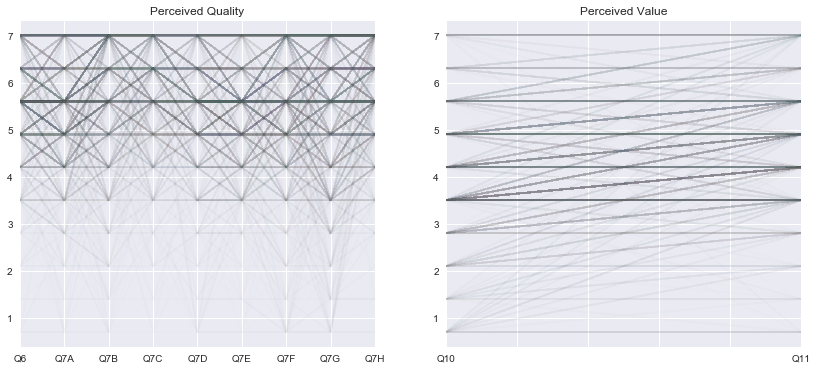

In [5]:
# Perceived Quality and Value constructs response patterns
fig, ax = plt.subplots(1,2, figsize=(14, 6))
mqm[perceivedQuality].sort_values(by=('Q6'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[0])
mqm[perceivedValue].sort_values(by=('Q10'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title("Perceived Quality")
ax[1].set_title("Perceived Value")

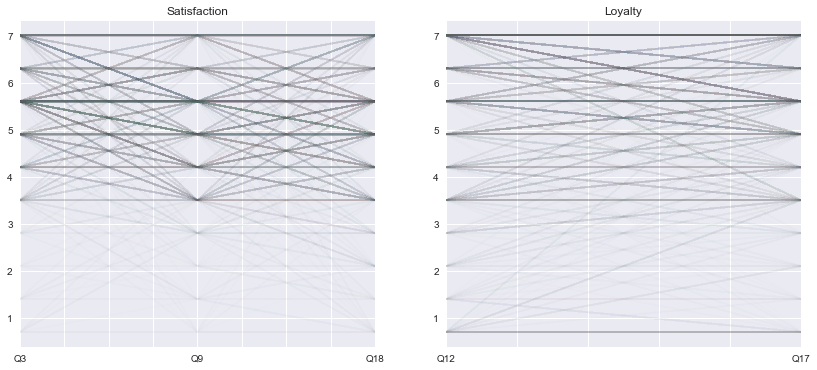

In [6]:
# Satisfaction and Loyalty constructs response patterns
fig, ax = plt.subplots(1,2, figsize=(14, 6))
mqm[satisfaction].sort_values(by=('Q3'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[0])
mqm[loyalty].sort_values(by=('Q12'), ascending=False).T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title("Satisfaction")
ax[1].set_title("Loyalty")

**The measurement scales:** For each question, an interval scale was used, from 1 to 10.

**The coding:** Was assigned numbers of each response to a point in the scale in a manner that facilitates measurement and the equidistant attribute were preserved in the interval-level measurement.

**The data distributions:** the answers to the questions asked were measured and the frequencies of each corresponding variable are presented in the flollowing table. 

In [7]:
mqm.describe()

,Bank,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,...,Q15,Q16,Q1516,Q17,Q18,B1,B2,B5,B6,B8
count,1758.000000,1406.000000,1756.000000,1748.000000,1707.000000,1601.000000,1733.000000,1688.000000,1692.000000,1634.000000,...,180.000000,1423.000000,1603.000000,1715.000000,1678.000000,1758.000000,1744.000000,1758.000000,1078.000000,1749.000000
mean,4.008532,1992.160028,5.485592,5.674485,5.946514,5.383573,5.471956,5.585900,5.216489,5.231151,...,4.087222,5.208433,5.082533,5.393469,5.076043,1.432309,62.068807,2.129124,2.833024,5.937107
std,2.001546,10.122136,1.182721,1.206779,1.056573,1.293575,1.376258,1.212952,1.162175,1.210245,...,2.167563,1.381508,1.531168,1.590136,1.356311,0.610776,15.669890,1.594257,0.624436,2.172625
min,1.000000,1950.000000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,...,0.700000,0.700000,0.700000,0.700000,0.700000,1.000000,18.000000,1.000000,1.000000,2.000000
25%,2.000000,1987.000000,4.900000,4.900000,5.600000,4.900000,4.900000,4.900000,4.200000,4.200000,...,2.800000,4.200000,4.200000,4.900000,4.200000,1.000000,51.000000,1.000000,3.000000,4.000000
50%,4.000000,1995.000000,5.600000,5.600000,6.300000,5.600000,5.600000,5.600000,5.600000,5.600000,...,4.200000,5.600000,5.600000,5.600000,4.900000,1.000000,64.000000,1.000000,3.000000,6.000000
75%,6.000000,2000.000000,6.300000,7.000000,7.000000,6.300000,7.000000,6.300000,5.600000,6.300000,...,5.775000,6.300000,6.300000,7.000000,5.600000,2.000000,75.000000,3.000000,3.000000,8.000000
max,7.000000,2005.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,88.000000,9.000000,9.000000,9.000000


When working with CB-SEM, the properties of normally behaved variables are allmost desirable, and Shapiro-Wilk test statistic is used in the experiment.

Nevertheless, PLS-SEM is a nonparametric approach, a distribution free technique, and methodologicaly, when working in PLS-SEM, the assumption of normality is not required. However, knowing the distribution of the variables under analysis provides the researcher with a better insight of the respondents behavior.

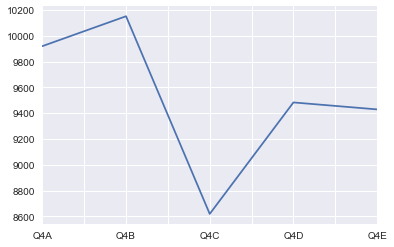

In [8]:
# plot the sum of image = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E']
mqm[image].sum().plot()

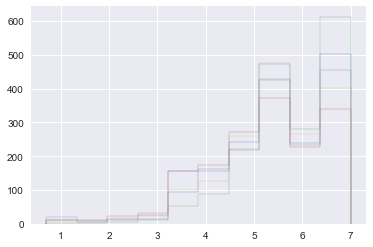

In [9]:
for _ in image:
    mqm[_].hist(histtype='step', stacked=True, fill=False)

#### PCA and Gaussian Mixture

If we plot a construct formed by normally distributed indicators, we would have something like the following: 

In [10]:
def PCAGM(data):
    # PCA - Principal Components Analysis
    pcaN = PCA(n_components=3, svd_solver='full').fit_transform(data.fillna(0))
    # Gaussian Mixture
    gmN = GaussianMixture(3).fit(data.fillna(0))
    labelsN = gmN.predict(data.fillna(0))
    
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    ax[0].set_title("PC1 - PC2")
    ax[0].scatter(pcaN[:,0], pcaN[:,1], c=labelsN, cmap='rainbow', alpha=0.5)
    ax[1].set_title("PC1 - PC3")
    ax[1].scatter(pcaN[:,0], pcaN[:,2], c=labelsN, cmap='rainbow', alpha=0.5)
    
    return

- Random normal distribution $ X = N(\mu, \sigma)$ where $X = [X_1, X_2, X_3, X_4, X_5]$

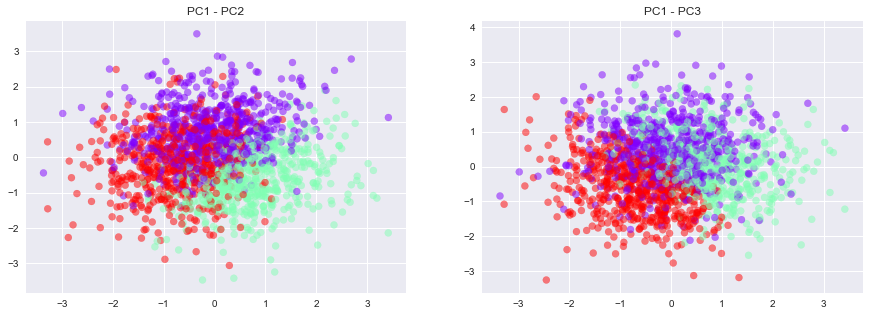

In [11]:
# Generate Random Normal Sample
mu, sigma, dimensao = (7-0.7)/2, 1, len(mqm)  # mean and standard deviation
mqmNormal = pd.DataFrame(np.random.normal(mu, sigma, dimensao * 5).reshape((dimensao, 5)), 
                         index = np.arange(len(mqm)), columns=image)
PCAGM(mqmNormal)

- Image construct

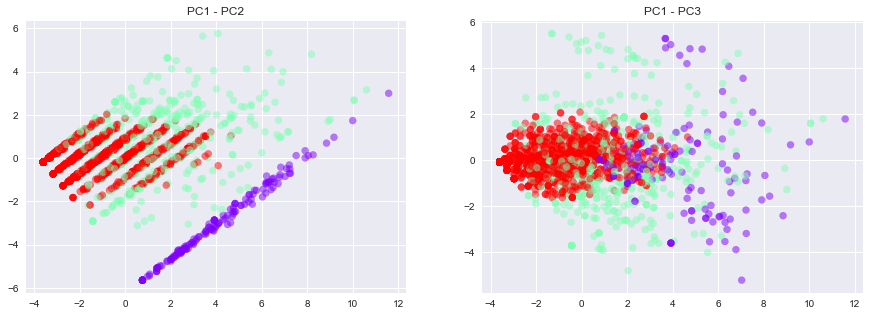

In [12]:
PCAGM(mqm[image])  # image = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E']

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Since the Image construct is a linear combination of five variables, we will use the t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the dimensionality of data to 2 or 3 dimensions so that we can plot our 1758 data points. It is a new unsupervised dimensionality reduction technique that learns a parametric mapping between the high-dimensional data space and the low-dimensional latent space. Parametric t-SNE learns the parametric mapping in such a way that the local structure of the data is preserved as well as possible in the latent space.  

The similarities between data points to joint probabilities are converted and the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data are minimized. However, t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

First, we compute conditional probabilites:

$$p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0,$$

to compute the joint probabilities:

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}.$$

A heavy-tailed distribution will be used to measure the similarities in the embedded space

$$q_{ij} = \frac{(1 + ||\boldsymbol{y}_i - \boldsymbol{y}_j)||^2)^{-1}}{\sum_{k \neq l} (1 + ||\boldsymbol{y}_k - \boldsymbol{y}_l)||^2)^{-1}},$$

You can find more details in Laurens van der Maaten, 2009, [Learning a Parametric Embedding by Preserving Local Structure](http://proceedings.mlr.press/v5/maaten09a/maaten09a.pdf).

Many parametric dimensionality reduction techniques, such as PCA and NCA (Goldberger et al., 2005), are hampered by their linear nature, which makes it difficult to successfully embed highly non-linear real-world data in the latent space. This new unsupervised parametric dimensionality reduction technique attempts to retain the local data structure in the latent space, parametrizing the non-linear mapping between the data space and the latent space by means
of a feed-forward neural network.

In [13]:
from sklearn.manifold import TSNE

def ecsiTSNE(data):
    X_tsne = TSNE(learning_rate=100).fit_transform(data.fillna(0))
    X_pca = PCA().fit_transform(data.fillna(0))
    
    # Gaussian Mixture
    gm = GaussianMixture(3).fit(data.fillna(0))
    labelsGM = gm.predict(data.fillna(0))
    
    figure(figsize=(10, 5))
    subplot(121)
    scatter(X_tsne[:, 0], X_tsne[:, 1], c=labelsGM, cmap='rainbow', alpha=0.5)
    subplot(122)
    scatter(X_pca[:, 0], X_pca[:, 1], c=labelsGM, cmap='rainbow', alpha=0.5)
    
    return

- Random normal distribution $ X = N(\mu, \sigma)$ where $X = [X_1, X_2, X_3, X_4, X_5]$

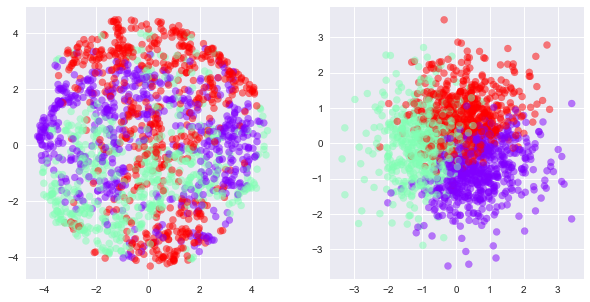

In [14]:
ecsiTSNE(mqmNormal)

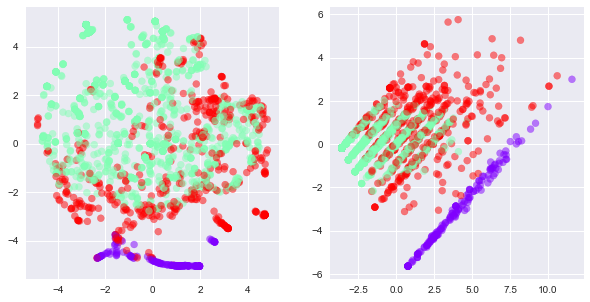

In [15]:
ecsiTSNE(mqm[image]) # image = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E']

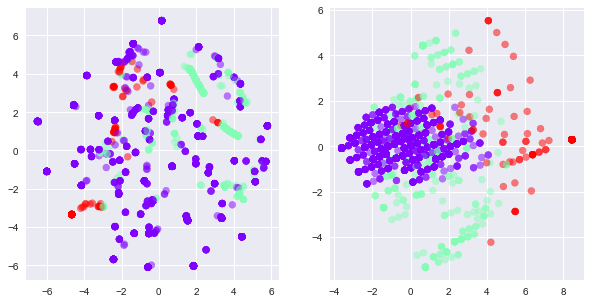

In [16]:
ecsiTSNE(mqm[expectations]) # expectations = ['Q5A', 'Q5B','Q5C']

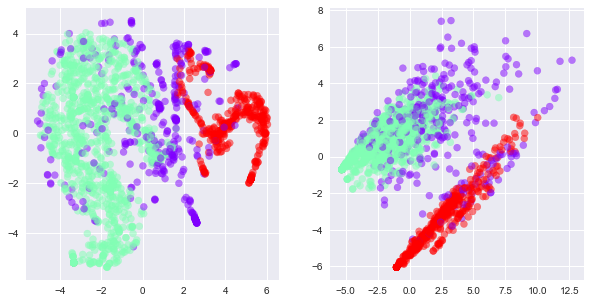

In [17]:
ecsiTSNE(mqm[perceivedQuality]) # perceivedQuality = ['Q6', 'Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F', 'Q7G', 'Q7H']

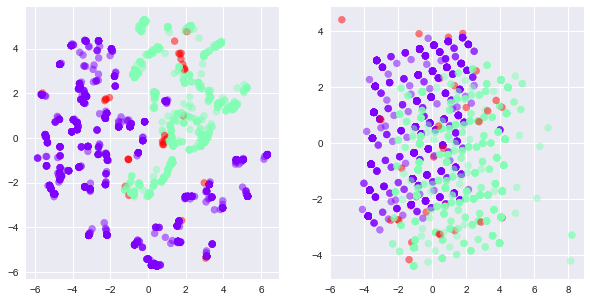

In [18]:
ecsiTSNE(mqm[socio]) # socio = ['Bank', 'B1', 'B5', 'B6', 'B8']

## ECSI MODEL EQUATIONS

The general form of the ECSI structural model is:

$$\eta =\beta\eta + \gamma \xi + \nu $$

$$E( \nu | \xi) = 0$$

where $\eta = (\eta_1, \eta_2, \dots, \eta_6)$ is the vector of endogenous latent variables:

- $\eta_1$ : customer expectations; 
- $\eta_2$ : perceived quality of products and services;
- $\eta_3$ : perceived value;
- $\eta_4$ : customer satisfaction (ECSI);
- $\eta_5$ : complaints;
- $\eta_6$ : customer loyalty.


$\xi$ is the exogenous latent variable (image), $\beta$ is the matrix of coeficients of $\eta$, $\gamma$ is the vector of coeficients of $\xi$, and $\nu$ is the vector of errors. 


$\begin{bmatrix}\eta_1\\ \eta_2\\ \eta_3\\ \eta_4\\ \eta_5\\ \eta_6\\ \end{bmatrix} =
\begin{bmatrix} 0&0&0&0&0&0\\ \beta_{21}&0&0&0&0&0 \\ \beta_{31}&\beta_{32}&0&0&0&0 \\ \beta_{41}&\beta_{42}&\beta_{43}&0&0&0 \\ 0&0&0&\beta_{54}&0&0 \\ 0&0&0&\beta_{64}&\beta_{65}&0 \\ \end{bmatrix} 
\begin{bmatrix}\eta_1\\ \eta_2\\ \eta_3\\ \eta_4\\ \eta_5\\ \eta_6\\ \end{bmatrix} +
\begin{bmatrix} \gamma_1\\ 0 \\ 0 \\ \gamma_4\\ 0 \\ \gamma_6\\ \end{bmatrix} \xi + 
\begin{bmatrix} \nu_1\\ \nu_2 \\ \nu_3 \\ \nu_4 \\ \nu_5 \\ \nu_6 \\ \end{bmatrix}$ 

#### Conceptual Model

## ECSI PLS-SEM PATH MODEL

![ECSI Path Model](ecsi_path_model.png "ECSI Path Model")

In [19]:
import networkx as nx
import pylab

G = nx.DiGraph()

G.add_node(1,pos="100,100")

G.add_node(2,pos="0,0")
G.add_node(3,pos="200,0")
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,1)

print(G.edges(data=True))
# [(1, 1, {}), (1, 2, {}), (1, 3, {})]

nx.drawing.nx_pydot.write_dot(G,'graph.dot')
# use -n to suppress node positioning (routes edges)
# run dot -n -Tpng graph.dot >graph.png

[(1, 1, {}), (1, 2, {}), (1, 3, {})]


## ECSI OUTER MODEL

### DATA DISTRIBUTION

The responses are requested using a 10-point scale, then the distribution of the answers in each of the possible response categories (1, 2, 3, ... , 10) can be calculated and displayed in a table or chart.

<pre>
-----------------
| Questão | Descrição | Valores
|:---:|:----|:----|
| Q2 | Ano a partir do qual o inquirido é cliente do banco | 9999 – NS/NR |
| Q3 | Grau de satisfação global com o banco | 1_10 <br>99: NS/NR | 
| Q4A | Banco de confiança no que diz e no que faz | 1_10 <br>99: NS/NR | 
| Q4B | Banco perfeitamente implantado no mercado | 1_10 <br>99: NS/NR | 
| Q4C | Contribui positivamente para a sociedade | 1_10 <br>99: NS/NR | 
| Q4D | Preocupa-se com os seus clientes | 1_10 <br>99: NS/NR | 
| Q4E | Banco inovador e virado para o futuro | 1_10 <br>99: NS/NR | 
| Q5A | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à qualidade global do mesmo | 1_10 <br>99: NS/NR |  
| Q5B | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à capacidade do mesmo oferecer produtos e serviços que satisfizessem as suas necessidades pessoais |1_10 <br>99: NS/NR |  
| Q5C | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à capacidade do mesmo evitar falhas ou erros |  1_10 <br>99: NS/NR | 
| Q6 | Qualidade apercebida do banco | 1_10 <br>99: NS/NR | 
| Q7A | Qualidade dos produtos e serviços bancários oferecidos | 1_10 <br>99: NS/NR | 
| Q7B | Atendimento e capacidade de aconselhamento | 1_10 <br>99: NS/NR | 
| Q7C | Acessibilidade a produtos e serviços por via das novas tecnologias | 1_10 <br>99: NS/NR | 
| Q7D | Fiabilidade dos produtos e serviços oferecidos | 1_10 <br>99: NS/NR |  
| Q7E | Diversidade de produtos e serviços | 1_10 <br>99: NS/NR | 
| Q7F | Clareza e transparência na informação fornecida |1_10 <br>99: NS/NR | 
| Q7G | Disponibilidade das agências |1_10 <br>99: NS/NR |  
| Q7H | Qualidade das agências | 1_10 <br>99: NS/NR | 
| Q9 | Realização das expectativas percepcionadas | 1_10 <br>99: NS/NR | 
| Q10 | Classificação dos preços e das taxas dos produtos e serviços do banco, dada a qualidade dos mesmos | 1_10 <br>99: NS/NR | 
| Q11 | Classificação da qualidade dos produtos e serviços do banco, dados os preços e as taxas dos mesmos  | 1_10 <br>99: NS/NR | 
| Q12 | Probabilidade de voltar a escolher o banco no caso de adquirir um produto ou serviço bancário | 1_10 <br>99: NS/NR | 
| Q13 | Diferença a partir da qual mudaria de banco face à redução de comissões, juros e outras taxas em outros bancos | 0_100(%) <br>222: FicaSempreBanco <br>999: NS/NR | 
| Q14 | Apresentação de reclamações  | 1: Sim <br>2: Não | 
| Q15  | (Caso Q14=1) Avaliação da forma como foi tratada a reclamação apresentada  | 1_10 <br>99: NS/NR | 
| Q16  | (Caso Q14=2) Expectativa na forma de resolução de uma possível reclamação | 1_10 <br>99: NS/NR | 
| Q17  | Probabilidade de recomendar o banco a outras pessoas | 1_10 <br>99: NS/NR | 
| Q18  | Medida de proximidade do banco do cliente a um banco que considere ideal | 1_10 9<br>9: NS/NR | 
</pre>
Nota: Nas respostas com escala de 1 a 10, os valores de 1 a 5 correspondem a avaliações negativas e os valores de 6 a 10 correspondem a avaliações
positivas.

<pre>
----------------
|Questão | Descrição | Valores |
|:---:|:----|:----|
| B1 | Género do inquirido | 1-Feminino <br> 2-Masculino | 
| B2 | Ano de nascimento do inquirido | (últimos dois dígitos) <br>99:Revelação recusada | 
| B5 | Situação profissional | 1 – Empregado <br>2 – Desempregado <br>3 – Estudante <br>4 – Doméstico <br>5 – Reformado <br>6 – Outra <br>9 – NS/NR | 
| B6 | (Caso B5=1 ou B5=6) Situação perante a actividade profissional | 1 – Patrão <br>2 – Trabalhador por conta própria <br>3 – Trabalhador por conta de outrem <br>4 – Outra <br>9 – NS/NR | 
| B8 | Nível de instrução escolar | 1 – Não sabe ler nem escrever <br>2 – Sabe ler e escrever sem possuir grau de ensino <br>3 – Ensino básico elementar <br>4 – Ensino básico preparatório <br>5 – Ensino secundário unificado <br>6 – Ensino secundário complementar <br>7 – Cursos médios <br>8 – Ensino superior incompleto <br>9 – Ensino superior completo ou mais <br>99 – NS/NR|
------------------
</pre>

## LOGISTIC REGRESSION

In [20]:
labels = pd.get_dummies(mqm[socio], columns=['Bank', 'B1', 'B5', 'B6', 'B8'])
features = mqm[['Q2', 'Q3', 'Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E', 'Q5A', 'Q5B', 'Q5C', 'Q6', 'Q7A', 'Q7B', 
                'Q7C', 'Q7D', 'Q7E', 'Q7F', 'Q7G', 'Q7H', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 
                'Q1516', 'Q17', 'Q18', 'B2']]

In [21]:
labels.columns = ['Bank_1', 'Bank_2', 'Bank_3', 'Bank_4', 'Bank_5', 'Bank_6', 'Bank_7',
                  'B1_1Feminino', 'B1_2Masculino ', 'B1_9NR',
                  'B5_1Empregado', 'B5_2Desempregado', 'B5_3Estudante', 
                  'B5_4Domestico', 'B5_5Reformado', 'B5_6Outra', 'B5_9NS/NR', 
                  'B6_1Patrão', 'B6_2TrabalhadorContaPropria', 'B6_3TrabalhadorContaOutrem', 
                  'B6_4Outra', 'B6_9NS_NR ', 
                  'B8_2SabeLerEscrever', 'B8_3EnsinoBasicoElementar', 'B8_4EnsinoBasicoPreparatorio', 
                  'B8_5EnsinoSecundarioUnificado', 'B8_6EnsinoSecundarioComplementar', 
                  'B8_7CursoMedio', 'B8_8EnsinoSuperiorIncompleto', 'B8_9EnsinoSuperiorCompleto']

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logitScores = {}
logitCoefs = pd.DataFrame(index=features.columns, columns = labels.columns)

for label in labels:
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels[[label]], 
                                                                       random_state=123)
    imp = Imputer()
    imp.fit(train_data)
    train_data = imp.transform(train_data)
    test_data = imp.transform(test_data)
    modelLogit = LogisticRegression()
    modelLogit = LogisticRegression().fit(train_data, train_labels.values.ravel())
    score = modelLogit.score(test_data, test_labels.values.ravel())
    #print('#', list(labels[[label]]), "Logit Score: %f" % score)
    #print(confusion_matrix(test_labels, modelLogit.predict(test_data)))
    logitScores[label] = score 
    logitCoefs[label] = modelLogit.coef_.T
    #print(" ")

logitScores = pd.DataFrame.from_dict([logitScores]).reindex(columns=logitCoefs.columns)

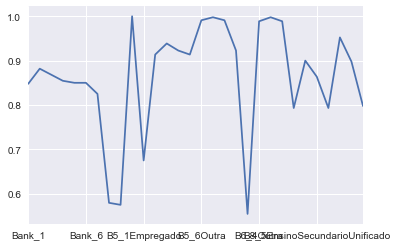

In [23]:
logitScores.T.plot(legend=False)

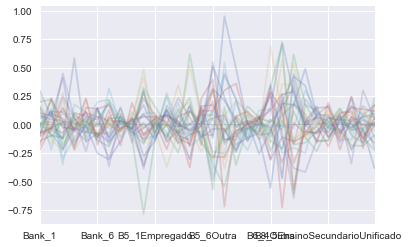

In [24]:
logitCoefs.T.plot(legend=False, alpha=0.25)

In [25]:
logitCoefs.T.head()

,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,Q5C,...,Q9,Q10,Q11,Q12,Q13,Q14,Q1516,Q17,Q18,B2
Bank_1,-0.001093,-0.016482,-0.221993,-0.071937,-0.017808,-0.101278,-0.061737,0.017417,-0.106335,0.101361,...,0.015230,-0.179294,0.076590,-0.179849,-0.019550,0.297771,0.153014,-0.076148,0.051110,0.001182
Bank_2,-0.001828,0.226192,-0.024992,-0.062755,-0.175519,0.133909,-0.037153,-0.084791,-0.024660,0.077934,...,0.022852,0.097009,0.045593,0.050858,-0.033392,0.064710,-0.106552,-0.029033,0.112476,-0.003328
Bank_3,-0.001285,-0.028030,0.019167,0.449511,0.217615,-0.294469,-0.123135,-0.211831,-0.073203,-0.017167,...,-0.128465,0.052487,0.035491,0.090007,0.028103,0.410852,0.026237,0.149160,0.110872,0.006073
Bank_4,-0.001324,-0.034563,-0.218546,0.058146,-0.202839,-0.114691,0.582337,0.084867,0.038071,-0.046370,...,0.061256,-0.034468,-0.187627,0.100397,-0.037830,-0.152429,0.015501,-0.045592,-0.045662,0.001171
Bank_5,-0.001785,0.031834,0.149065,-0.235579,0.224817,0.020736,-0.152599,0.016515,0.101990,-0.016388,...,-0.111728,0.115841,0.012856,-0.036722,0.066726,-0.008988,-0.005303,0.229183,-0.139418,0.006842


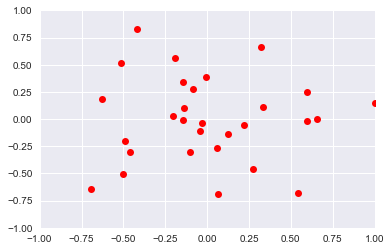

In [26]:
from sklearn.decomposition import PCA
pca = PCA().fit_transform(logitCoefs)
plt.plot(pca[:,0],pca[:,1], 'ro')
plt.axis([-1, 1, -1, 1])
plt.show()

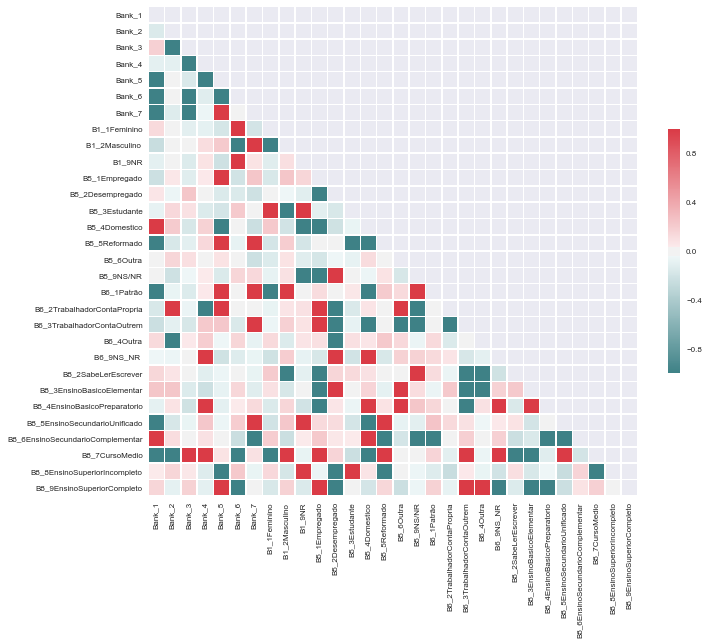

In [27]:
#sns.set(style="white")
sns.set_context("paper")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(logitCoefs.corr(), columns=labels.columns)

# Compute the correlation matrix
corr = logitCoefs.corr()
corr[corr > 0.25] = 1
corr[corr < -0.25] = -1

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,  
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)